In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\harsh\Insurance-Premium-Prediction\premium\artifact\data_ingestion\2022-07-15-15-22-05\raw_data\insurance")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
df["cat_age"] = pd.cut(
                df["age"],
                bins=[0.0, 20.0, 30.0, 40.0, 50.0, np.inf],
                labels=[1,2,3,4,5]
            )

In [25]:
df["cat_age"]

0       1
1       1
2       2
3       3
4       3
       ..
1333    4
1334    1
1335    1
1336    2
1337    5
Name: cat_age, Length: 1338, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [26]:
df["cat_age"].unique()

[1, 2, 3, 4, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

<AxesSubplot:ylabel='Frequency'>

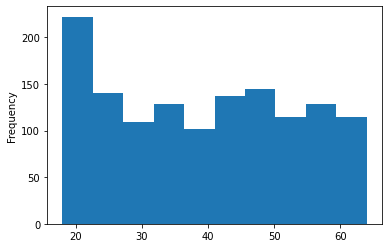

In [28]:
df["age"].plot(kind="hist")


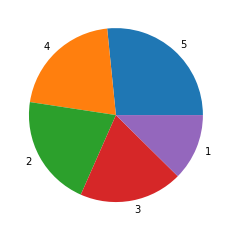

In [7]:
plt.pie(df.cat_age.value_counts(), labels = df.cat_age.value_counts().index)
plt.show()

In [8]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [9]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [10]:
df.dtypes

age            int64
sex           object
bmi          float64
children       int64
smoker        object
region        object
expenses     float64
cat_age     category
dtype: object

In [11]:
df['expenses'] = df['expenses'].astype('float64')
df['expenses']

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [12]:
df.dtypes

age            int64
sex           object
bmi          float64
children       int64
smoker        object
region        object
expenses     float64
cat_age     category
dtype: object

In [13]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [14]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [15]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

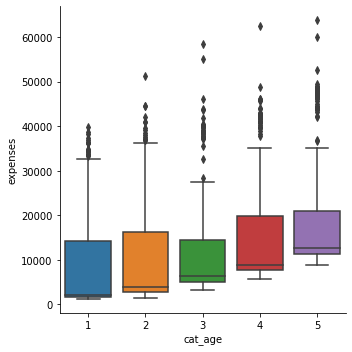

In [29]:
sns.catplot(y='expenses', x='cat_age', data=df ,kind='box')

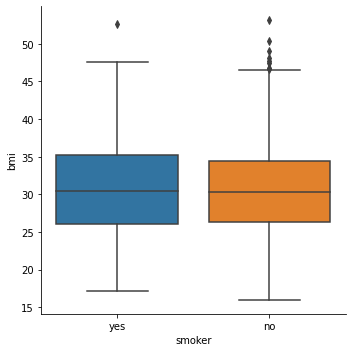

In [18]:
sns.catplot(y='bmi', x='smoker', data=df ,kind='box')

In [19]:
df.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [20]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
cat_age     0
dtype: int64

In [21]:
df1 = pd.read_csv(r'C:\Users\harsh\Insurance-Premium-Prediction\premium\artifact\data_ingestion\2022-07-14-19-57-12\ingested_data\train\insurance')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\harsh\\Insurance-Premium-Prediction\\premium\\artifact\\data_ingestion\\2022-07-14-19-57-12\\ingested_data\\train\\insurance'

In [ ]:
df1

,age,sex,bmi,children,smoker,region
0,37,female,17.3,2,no,northeast
1,18,male,33.3,0,no,southeast
2,30,female,28.4,1,no,northwest
3,18,male,23.3,1,no,southeast
4,40,male,35.3,3,no,southwest
...,...,...,...,...,...,...
931,47,male,36.1,1,yes,southeast
932,30,female,27.9,0,no,northeast
933,47,male,28.2,4,no,northeast
934,58,female,36.5,0,no,northwest


In [ ]:
df1.columns()

TypeError: 'Index' object is not callable